In [1]:
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

## DATA DOWNLOADING (RIGHT NOW USE TESTING DATA)

In [2]:
data = pd.read_csv("Data/aapl_us_d.csv")

In [3]:
stock_price_df = data    
stock_price_df['Date'] = pd.to_datetime(stock_price_df['Date'])
stock_price_df["Date"] = stock_price_df["Date"].apply(mdates.date2num)

## Set Parameter and segment DF

In [4]:
l_period = 30
p_period = 10
criteria = {
    "down":[-1,-.05],
    "same":[-.05,0.04],
    "up":[.04,1]
}

In [46]:
def graph_section(df,catagory,filename,path):

    # Creating required data in new DataFrame OHLC
    ohlc= df[['Date', 'Open', 'High', 'Low','Close']].copy()
    f1, ax = plt.subplots(figsize = (20,10))

    # plot the candlesticks
    candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    directory = path + catagory
    if not os.path.exists(directory):
        os.makedirs(directory)
    filepath = directory + "/" + filename + ".png"
    plt.savefig(filepath)
    
    
def graph_section_candlestick(df,catagory,filename,path):

    # Creating required data in new DataFrame OHLC
    ohlc= df[['Date', 'Open', 'High', 'Low','Close']].copy()
    f1, ax = plt.subplots(figsize = (20,10))

    # plot the candlesticks
    candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    directory = path + catagory
    if not os.path.exists(directory):
        os.makedirs(directory)
    filepath = directory + "/" + filename + ".png"
    plt.savefig(filepath)

def catagorizer(x,criteria):
    for i in criteria:
        if x > criteria[i][0] and x <= criteria[i][1]:
            return i
        else:
            pass

In [47]:
def makeData(df,l_period, p_period, criteria): 
    print(l_period + 1,df.shape[0], p_period)
    if df.shape[0] < l_period + 1:
        raise ValueError('Insufficient number of rows.')
    for i in range(l_period + 1,df.shape[0] - p_period, p_period):
        
        diff = (df.iloc[i + p_period]["Close"] - df.iloc[i]["Close"]) / float(df.iloc[i]["Close"]) 
        cata_name = catagorizer(diff, criteria)
        print(float(i) * p_period/(df.shape[0] - p_period),cata_name)
        graph_section(df.iloc[(i - l_period - 1):(i-1)],cata_name,str(df.iloc[i]["Date"]),"Output/")

In [6]:
df = stock_price_df.head(10)
#makeData(df,l_period, p_period, criteria)

Text(0, 0.5, 'Close')

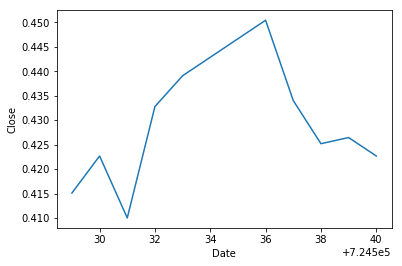

In [10]:
plt.plot(df['Date'], df['Close'])

# Adding labels
plt.xlabel('Date')  
plt.ylabel('Close')  
#plt.title('Simple time series plot for HDFC') 

# Saving image

#plt.savefig('Simple time series plot for HDFC.png')

# In case you dont want to save image but just displya it
#plt.show()